# Machine Learning pour expliquer le prix de l'électricité
Hugo PANEL, Jeremy SELLAM, Mohamed ZAMMIT CHATTI

--------------------------------


Dans le contexte climatique et géopolitique actuel, l'évolution du prix de l'électricité est une question de plus en plus importante. Ce projet a pour objectif de nous faire travailler sur la variation de son prix à l'aide de plusieurs modèles d'apprentissage machine et de données fournies sur les variations de température, climat, importation et exportation, production et consommation de la France et de l'Allemagne.

Nous allons donc, au cours de ce projet, explorer les données dont nous disposons, les nettoyer, entraîner et utiliser les modèles de régression linéaire simple, Ridge, Lasso, K-NN et d'arbre de décision, avant de sélectionner le modèle le plus approprié grâce à des métriques d'évaluation de leurs performances (Spearman, R2, et RMSE) pour prédire les données de DataNew_Y.csv.


--------------------------------

Observations et exploration des données :
- Les données contiennent des valeurs NaN.
- Des valeurs sont manquantes (ex: l'id 1 n'existe pas) --> Ces valeurs se trouvent dans DataNew_X.csv !
- Les fichiers Data_X.csv et DataNew_X.csv contiennent bien les mêmes features (colonnes).

## Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import *
from sklearn.model_selection import train_test_split

X = pd.read_csv('Data/Data_X.csv')  # Données
y = pd.read_csv('Data/Data_Y.csv')  # Classes

# Regrouper X et Y
data = pd.concat([X, y], axis=1)
print(data)

        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
0     1054     206      FR        0.210099       -0.427458       -0.606523  \
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

# Choix du modèle

-> On dispose de valeurs continues.
-> On ne souhaite pas donner une classe prédéfinie, mais prédire une valeur continue.
On va prendre un *algorithme de régression*.

Nous allons tester les modèles suivants :
1. Régression linéaire simple
2. Régression linéaire régularisée (régression RIDGE + régression LASSO)
3. Méthode des k plus proches voisins pour la régression (K-NN regressor)
4. Arbres de décision pour la régression


# Nettoyage des données

Premièrement, il faut explorer les données avec data.info(), data.describe() et data.isnull().
On remarque que certaines cellules ont pour valeur NaN. On peut choisir :
- de supprimer les lignes qui contiennent des valeurs nulles, avec X.dropna() par exemple,
- de remplir les cellules nulles, avec X.fillna(nouvelle_valeur).

On peut aussi choisir de modifier des valeurs aberrantes avec X.replace(valeur, nouvelle) ou de les supprimer (on remplace par np.nan puis on supprime comme au-dessus).

In [3]:
# On observe les différentes colonnes :
data.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'ID', 'TARGET'],
      dtype='object')

In [4]:
# Combien y a-t-il de valeurs nulles par colonne ?
data.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
ID                    0
TARGET                0
dtype: int64

In [5]:
# On supprime les lignes qui contiennent des valeurs null :
data = data.dropna()
data.isnull().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
ID                  0
TARGET              0
dtype: int64

In [6]:
# Etude des valeurs min, max, moyennes, etc. de chaque colonne :
data.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,1077.272727,588.365987,0.358323,-0.114128,-0.139238,0.139238,-0.268127,-0.103871,0.268127,0.103871,...,0.003353,0.186522,0.198205,0.009948,0.010945,0.063241,0.029728,0.066230,1077.272727,0.093677
std,647.608506,342.278568,0.667052,0.862587,0.978287,0.978287,0.966510,1.100724,0.966510,1.100724,...,1.056972,1.071384,1.069974,0.943305,0.998779,1.115762,1.026389,1.119411,647.608506,1.071405
min,0.000000,1.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.392852,-4.281790,0.000000,-6.519268
25%,530.500000,292.000000,-0.076672,-0.740151,-0.963290,-0.654735,-1.008176,-0.895526,-0.452252,-0.819463,...,-0.522646,-0.616389,-0.627847,-0.612091,-0.668435,-0.651410,-0.468260,-0.545607,530.500000,-0.245709
50%,1159.500000,586.000000,0.281250,-0.470896,-0.105837,0.105837,-0.335690,0.065382,0.335690,-0.065382,...,-0.238458,-0.176477,-0.132396,-0.034815,-0.032882,0.000000,0.035338,0.028797,1159.500000,-0.005201
75%,1610.250000,884.250000,0.862662,0.436629,0.654735,0.963290,0.452252,0.819463,1.008176,0.895526,...,0.148034,0.764577,0.984079,0.630895,0.702167,0.697493,0.620505,0.588373,1610.250000,0.285540
max,2146.000000,1212.000000,2.033851,2.455052,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.607281,5.471818,2146.000000,7.786578


In [7]:
# Vérification de l'existence de lignes dupliquées :
data.duplicated().any()

# data.duplicated().any() retourne False donc pas besoin de supprimer les lignes en double puisqu'il n'y en a pas.

False

In [8]:
# On resépare les données en X et y :
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]

# Analyse univariée des données
On trace les histogrammes des variables pour obtenir leur évolution.

In [9]:
import matplotlib

matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})
data.hist()
plt.tight_layout()
plt.savefig('histogrammes.png', dpi=500)

plt.close()
plt.clf()

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
for column in data.columns:
    if column != 'COUNTRY':
        plt.boxplot(data[column])
        plt.title("Diagramme de boîte pour la colonne '" + column + "'")
        plt.savefig('boxdiag/box_' + column + '.png', dpi=500)
        plt.close()
        plt.clf()

<Figure size 640x480 with 0 Axes>

# Analyse bivariée des données
En utilisant X.describe(), on remarque que la colonne ID ne devrait pas être prise en compte lors de l'analyse puisqu'elle n'a aucune dimension réelle. De la même manière, il ne faudra pas prendre en compte la colonne DAY_ID.

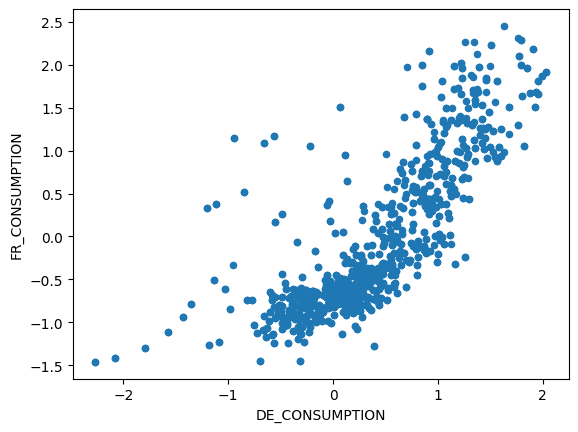

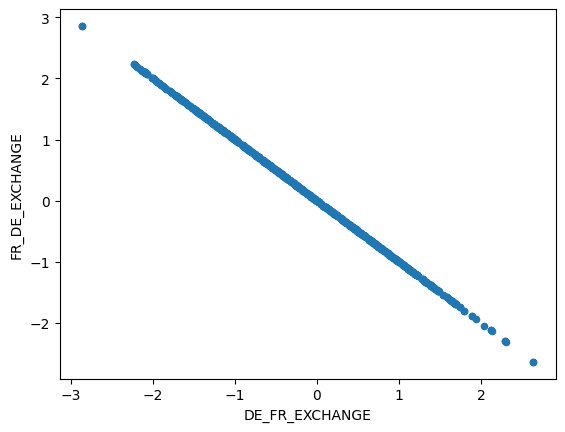

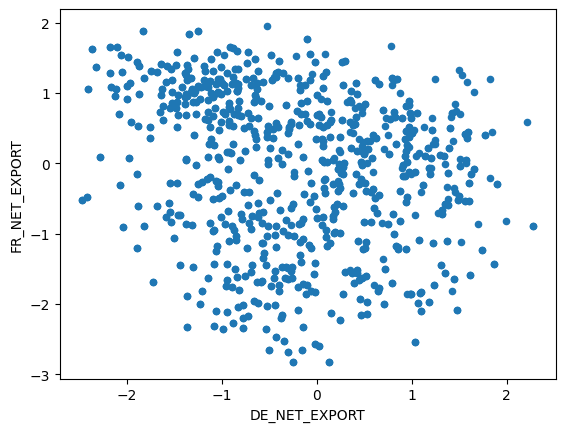

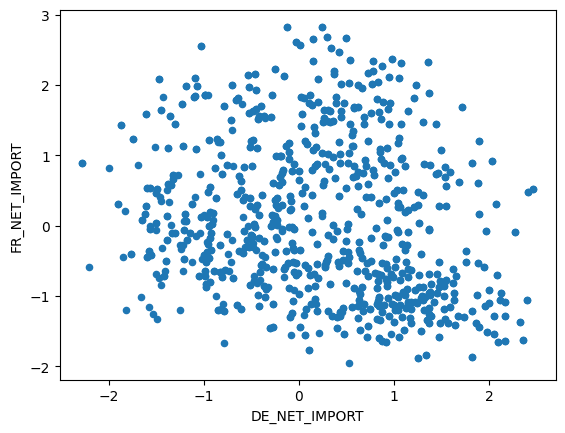

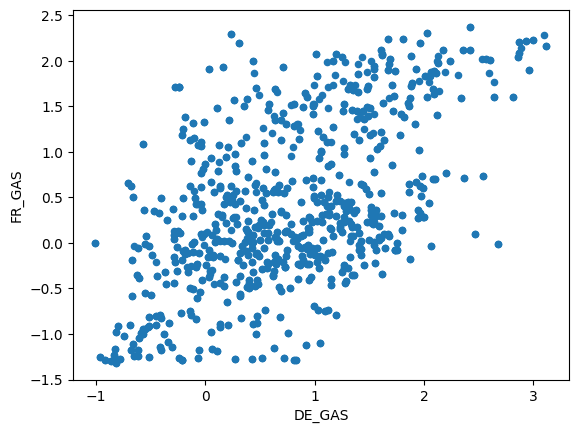

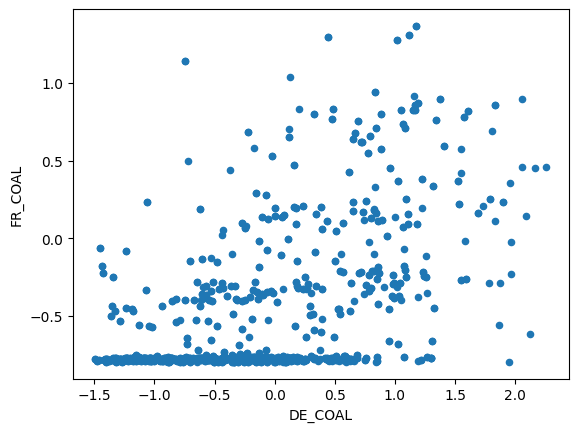

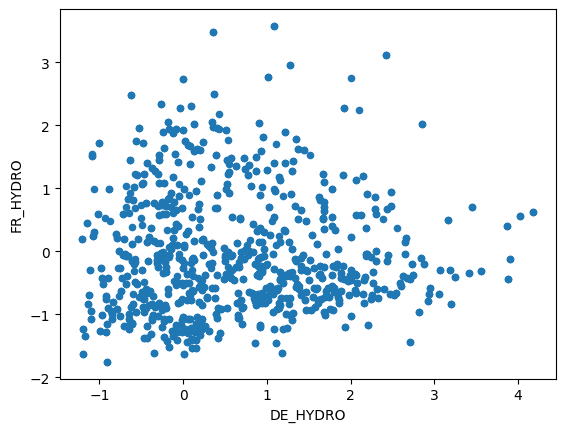

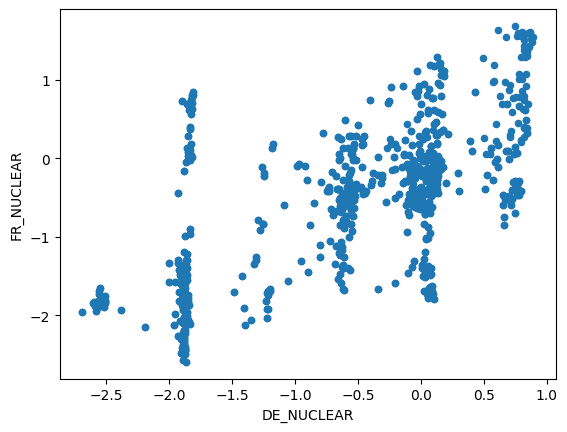

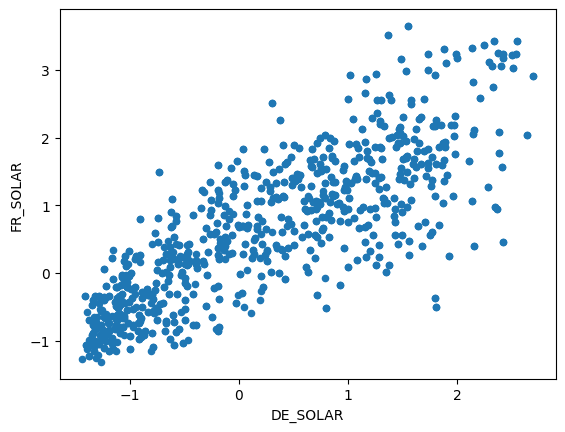

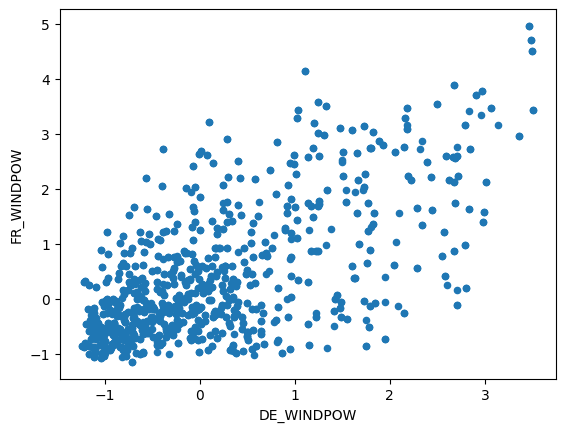

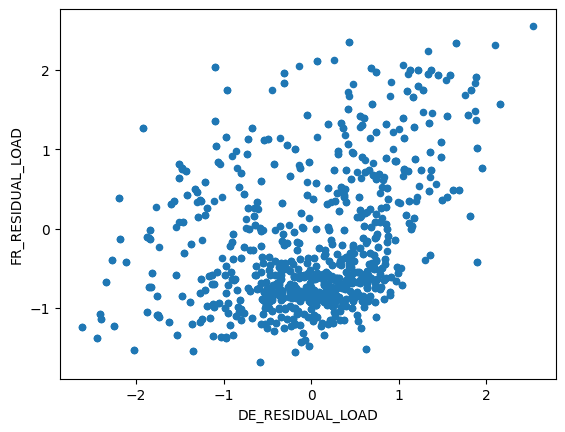

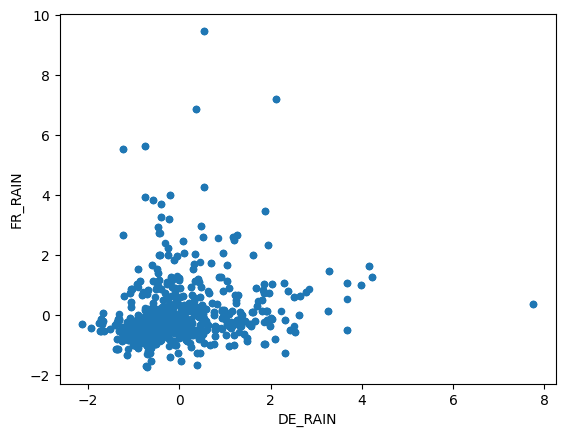

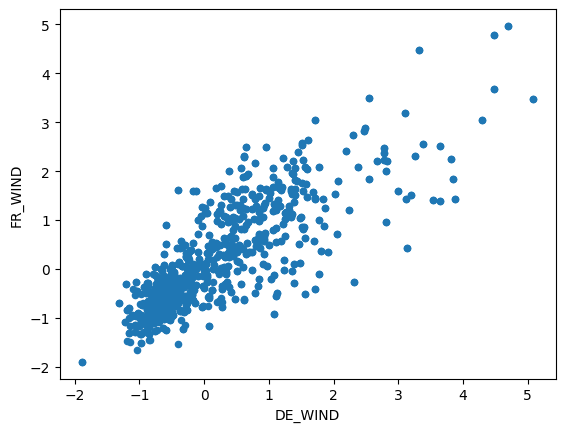

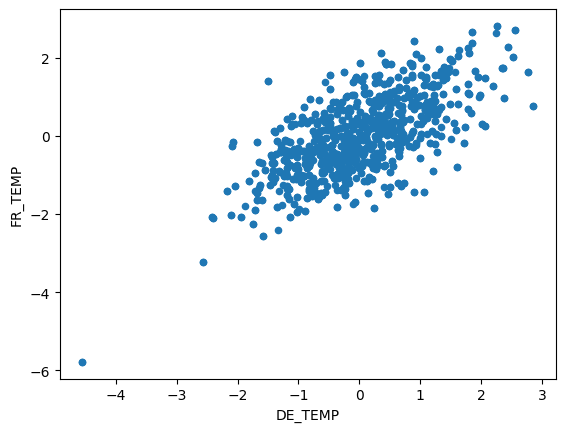

In [10]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

X.plot.scatter("DE_CONSUMPTION", "FR_CONSUMPTION")
X.plot.scatter("DE_FR_EXCHANGE", "FR_DE_EXCHANGE")
X.plot.scatter("DE_NET_EXPORT", "FR_NET_EXPORT")
X.plot.scatter("DE_NET_IMPORT", "FR_NET_IMPORT")
X.plot.scatter("DE_GAS", "FR_GAS")
X.plot.scatter("DE_COAL", "FR_COAL")
X.plot.scatter("DE_HYDRO", "FR_HYDRO")
X.plot.scatter("DE_NUCLEAR", "FR_NUCLEAR")
X.plot.scatter("DE_SOLAR", "FR_SOLAR")
X.plot.scatter("DE_WINDPOW", "FR_WINDPOW")
X.plot.scatter("DE_RESIDUAL_LOAD", "FR_RESIDUAL_LOAD")
X.plot.scatter("DE_RAIN", "FR_RAIN")
X.plot.scatter("DE_WIND", "FR_WIND")
X.plot.scatter("DE_TEMP", "FR_TEMP")
plt.show()

# Devrions-nous séparer les données pour chaque pays ?
Pour savoir si nous devrions séparer nos données pour la France et pour l'Allemagne, nous pouvons utiliser un diagramme heatmap qui nous montrera la corrélation pour chaque feature.

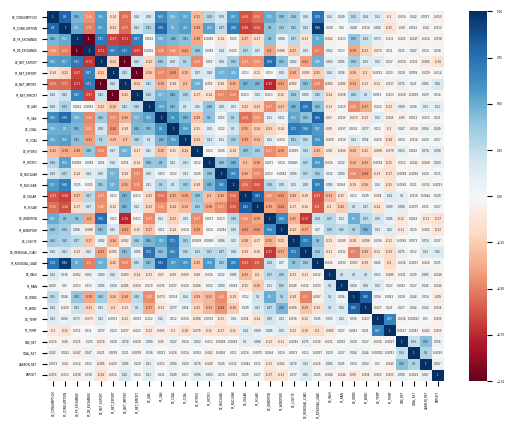

In [11]:
matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})

# On étudie les coefficients de corrélation
plt.close()
plt.clf()

# Corrélation FR
sn.heatmap(data.drop(columns=['ID', 'DAY_ID', 'COUNTRY']).corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_global.png', dpi=500)
plt.show()
plt.close()
plt.clf()
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

Sur ce diagramme, on observe que des variables comme la variation de production d'électricité à base d'énergie solaire en Allemagne et la variation de la consommation en France sont plutôt corrélées alors qu'elles n'ont a priori que peu de rapport.
Puisque nous pouvons faire ces observations pour plusieurs variables, nous avons décidé de diviser nos données en deux jeux : un pour la France, et un pour l'Allemagne. Cela nous permettra d'étudier nos données et de faire des prédictions sans que les données d'un autre pays n'entre en jeu.

In [12]:
from sklearn.preprocessing import StandardScaler

# On split les données par pays.
# On aura un jeu pour la France, et un autre pour l'Allemagne

# Pour identifier le pays, on remplace la colonne COUNTRY ['FR', 'DE'] par les colonnes COUNTRY_FR et COUNTRY_DE ['0', '1'].
data_per_country = pd.get_dummies(data, columns=['COUNTRY'], prefix='COUNTRY')

# Séparation en deux jeux
data_fr = data_per_country[data_per_country['COUNTRY_FR']]
data_de = data_per_country[data_per_country['COUNTRY_DE']]

# Séparation des X et des y.
target_fr = data_fr['TARGET']
target_de = data_de['TARGET']

# On ne garde que les colonnes correspondantes au pays (on affine dans une partie plus tard) :
data_fr = data_fr[
    ['FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND', 'FR_TEMP', 'GAS_RET', 'COAL_RET',
     'CARBON_RET']]
data_de = data_de[
    ['DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL', 'DE_HYDRO',
     'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'DE_RAIN', 'DE_WIND', 'DE_TEMP',
     'GAS_RET', 'COAL_RET', 'CARBON_RET']]

# On normalise
scaler = StandardScaler()
names = data_fr.columns
scaled_data = scaler.fit_transform(data_fr)
data_fr = pd.DataFrame(scaled_data, columns=names)

names = data_de.columns
scaled_data = scaler.fit_transform(data_de)
data_de = pd.DataFrame(scaled_data, columns=names)


In [13]:
matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})

# On étudie les coefficients de corrélation en créant deux autres heatmap : une par pays.
plt.close()
plt.clf()

# Corrélation FR
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_fr.png', dpi=500)
plt.close()
plt.clf()

# Corrélation FR en affichant uniquement les coefficients >= 0,6
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr()[fr.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_fr_0,6.png', dpi=500)
plt.close()
plt.clf()

# Corrélation DE
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_de.png', dpi=500)
plt.close()
plt.clf()

# Corrélation DE en affichant uniquement les coefficients >= 0,6
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr()[de.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_de_0,6.png', dpi=500)
plt.close()
plt.clf()

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

## Régression linéaire simple

In [14]:
# On sépare les données en un jeu d'entraînement et un jeu de test :
data_fr_train, data_fr_test, target_fr_train, target_fr_test = train_test_split(data_fr, target_fr, random_state=10, test_size=0.2)
data_de_train, data_de_test, target_de_train, target_de_test = train_test_split(data_de, target_de, random_state=10, test_size=0.2)

# Instanciation du modèle de régression linéaire simple avec SciKit-Learn
reg_lin_simple = linear_model.LinearRegression()

# Entraînement sur les données de la France
reg_lin_simple.fit(data_fr_train, target_fr_train)

LinearRegression()

# Evaluation des modèles
Avant de passer à la régression linéaire RIDGE et aux autres modèles, nous allons chercher à vérifier leurs performances puis à les comparer.
Pour ce faire, nous disposons d'outils comme la **corrélation de Spearman**, le **coefficient de détermination R2**, et l'**erreur quadratique moyenne** (ou RMSE en anglais).

Nous allons donc utiliser les fonctions correspondantes de SciKit-Learn pour évaluer nos modèles.

In [15]:
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_squared_error

print("Régression linéaire simple :")
#### POUR LA FRANCE
print("- France :")
# On a déjà entraîné le modèle, donc pas besoin de fit().
# On prédit les valeurs y pour le jeu de test :
predict_fr = reg_lin_simple.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)

#### POUR L'ALLEMAGNE
print("- Allemagne :")
# Il faut entraîner le modèle sur les données de l'Allemagne :
reg_lin_simple.fit(data_de_train, target_de_train)
# On prédit les valeurs de y pour le jeu de test :
predict_de = reg_lin_simple.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire simple :
- France :
    Spearman : 0.07525881398788224
    R2 : 0.018719823167615446
    RMSE : 1.0645536636453008
- Allemagne :
    Spearman : 0.3582123758594346
    R2 : 0.07454547719594895
    RMSE : 0.9808252480205008


## Interprétation
La valeur retournée par Spearman est comprise entre -1 et 1. Si l'on compare notre jeu de test avec celui que nous avons prédit et que nous trouvons un résultat proche de 1, cela signifie que les deux jeux sont très proches, et que notre prédiction était plutôt exacte.
Cependant, on remarque que l'on obtient ~0.0753 pour la France et ~0.0745 pour l'Allemagne. Nos prédictions ne sont donc pas corrélées avec le target de test attendu.

Le coefficient r-carré ou R² est un pourcentage, qui est donc compris entre 0 et 1. Plus R² se rapproche de 1, plus nos prédictions sont correctes. Pour la France et l'Allemagne, nos R² sont tous inférieurs à 0.1. Nos prédictions sont ainsi peu précises.

Ici, les valeurs RMSE obtenues sont proches de 1, ce qui est plutôt satisfaisant au vu de nos données initiales.

Cependant, à cause des valeurs obtenues pour Spearman et R2, on peut conclure que notre modèle ne prédit pas de valeurs précises.

## Améliorer les résultats
Pour améliorer nos résultats, nous pouvons utiliser les diagrammes heatmap que nous avons généré plus tôt.
Ceux-ci nous indiquent les variables qui sont corrélées entre elles.

On peut par exemple arbitrairement choisir de ne garder que les variables qui ont un facteur de corrélation avec d'autres variables supérieur ou égal à 0,6.
Pour la France, cela signifie que l'on ne garde que les variables FR_CONSUMPTION, FR_DE_EXCHANGE, FR_NET_EXPORT, FR_NET_IMPORT, FR_GAS, FR_NUCLEAR, FR_SOLAR et FR_RESIDUAL_LOAD. Pour l'Allemagne, ce sont les variables DE_CONSUMPTION, DE_FR_EXCHANGE, DE_NET_EXPORT, DE_NET_IMPORT, DE_GAS, DE_COAL, DE_SOLAR, DE_WINDPOW, DE_LIGNITE et DE_RESIDUAL_LOAD.

On peut maintenant recommencer à sélectionner nos variables, les normaliser et entraîner notre modèle :

In [16]:
# On ne garde que les variables significatives :
data_fr = data_fr[
    ['FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_RESIDUAL_LOAD']]
data_de = data_de[
    ['DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL',
     'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD']]

# On sépare les données en un jeu d'entraînement et un jeu de test :
data_fr_train, data_fr_test, target_fr_train, target_fr_test = train_test_split(data_fr, target_fr, random_state=10, test_size=0.2)
data_de_train, data_de_test, target_de_train, target_de_test = train_test_split(data_de, target_de, random_state=10, test_size=0.2)

# On ré-entraîne le modèle et on affiche les métriques :
print("Régression linéaire simple :")
#### POUR LA FRANCE
print("- France :")
# On entraîne le modèle sur les nouvelles données
reg_lin_simple.fit(data_fr_train, target_fr_train)
# On prédit les valeurs y pour le jeu de test :
predict_fr = reg_lin_simple.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)

#### POUR L'ALLEMAGNE
print("- Allemagne :")
# Il faut entraîner le modèle sur les données de l'Allemagne :
reg_lin_simple.fit(data_de_train, target_de_train)
# On prédit les valeurs de y pour le jeu de test :
predict_de = reg_lin_simple.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire simple :
- France :
    Spearman : 0.02231286675254043
    R2 : -0.017377473372558905
    RMSE : 1.0839571259123975
- Allemagne :
    Spearman : 0.3620945899020765
    R2 : 0.06689819908292005
    RMSE : 0.9848693215015437


On remarque que nos métriques affichent des résultats moins bons que les précédents. Cela peut s'expliquer par le fait que le modèle de régression linéaire simple n'est pas adapté à nos données.

Pour la France, le coefficient R2 est négatif ce qui signifie que notre modèle de régression n'est pas adapté à nos données.

# Régression linéaire RIDGE
La régression Ridge est une régression linéaire qui, contrairement à la régression linéaire simple, utilise des coefficients quadratiques pour appliquer une pénalité sur les valeurs. Elle permet donc de limiter l'effet de sur-ajustement du modèle aux données d'entraînement.

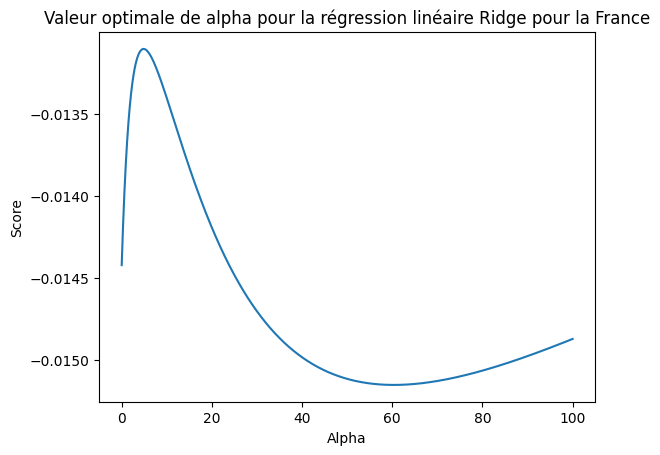

Pour la France, la valeur optimale pour alpha est : 4.852426213201701


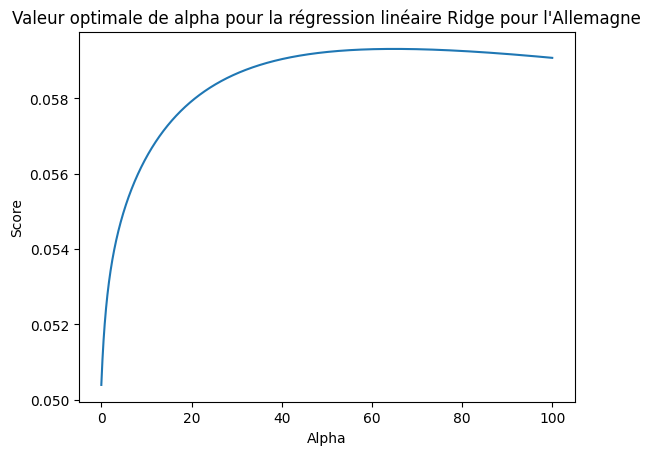

Pour l'Allemagne, la valeur optimale pour alpha est : 64.93246623315163


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# On va chercher le meilleur coefficient alpha pour la régression Ridge.
# Nous allons en tester 200 valeurs différentes.
alphas = np.linspace(1e-10, 100, 2000)

#### Pour la France
# Créer une liste pour stocker les scores de validation croisée pour chaque valeur d'alpha
scores = []

# Effectuer la validation croisée pour chaque valeur d'alpha
for alpha in alphas:
    ridge = Ridge(alpha) # Test du Ridge avec notre nouveau alpha
    scores.append(np.mean(cross_val_score(ridge, data_fr_train, target_fr_train, scoring='r2'))) # Ajout du score à la liste des scores

plt.plot(alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Valeur optimale de alpha pour la régression linéaire Ridge pour la France')
plt.show()

# On peut aussi directement afficher la valeur optimale de alpha
print("Pour la France, la valeur optimale pour alpha est :", alphas[np.argmax(scores)])


#### Pour l'Allemagne
# Créer une liste pour stocker les scores de validation croisée pour chaque valeur d'alpha
scores = []

# Effectuer la validation croisée pour chaque valeur d'alpha
for alpha in alphas:
    ridge = Ridge(alpha) # Test du Ridge avec notre nouveau alpha
    scores.append(np.mean(cross_val_score(ridge, data_de_train, target_de_train, scoring='r2'))) # Ajout du score à la liste des scores

plt.plot(alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Valeur optimale de alpha pour la régression linéaire Ridge pour l\'Allemagne')
plt.show()

# On peut aussi directement afficher la valeur optimale de alpha
print("Pour l\'Allemagne, la valeur optimale pour alpha est :", alphas[np.argmax(scores)])

In [18]:
# On recommence la régression linéaire Ridge pour la France avec alpha = 4.852
ridge = Ridge(4.852)
ridge.fit(data_fr_train, target_fr_train)
predict_fr = ridge.predict(data_fr_test)

# On mesure la précision
print("Régression linéaire Ridge :")
print("- France :")

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)



# Cette fois-ci pour l'Allemagne avec alpha = 64.932
print("- Allemagne :")
# Il faut entraîner le modèle sur les données de l'Allemagne :
ridge.fit(data_de_train, target_de_train)
# On prédit les valeurs de y pour le jeu de test :
predict_de = ridge.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire Ridge :
- France :
    Spearman : 0.00785267878440914
    R2 : -0.013813810383804803
    RMSE : 1.0820570216601286
- Allemagne :
    Spearman : 0.37528300576428913
    R2 : 0.06978670045775515
    RMSE : 0.9833437637424665


Comme pour la régression linéaire simple, on observe que les résultats obtenus ne sont pas satisfaisants, et sont même pires avec la régression Ridge.

# Régression linéaire Lasso
La régression Lasso a le même objectif que la régression Ridge mais elle utilise des coefficients de pénalité de linéaires plutôt que quadratiques.

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(data_fr_train, target_fr_train)

print("Nombre de coefficients nulls :", sum(lasso.coef_ == 0))

Nombre de coefficients nulls : 8


On remarque que tous les coefficients sont nuls.
On va tester différentes valeurs de alpha :

In [20]:
from sklearn.metrics import r2_score

res = []
for alpha in np.linspace(0.00001, 0.4, 1000):
    lasso = Lasso(alpha)
    lasso.fit(data_fr_train, target_fr_train)
    r2 = r2_score(target_fr_test, lasso.predict(data_fr_test))
    res.append({'alpha': alpha, 'r2': r2,
                'nbnull': sum(lasso.coef_ == 0)})

df = pd.DataFrame(res)

print("Le meilleur alpha est :", max(res, key=lambda x:x['r2']))

Le meilleur alpha est : {'alpha': 0.01962912912912913, 'r2': 0.002133771548057495, 'nbnull': 6}


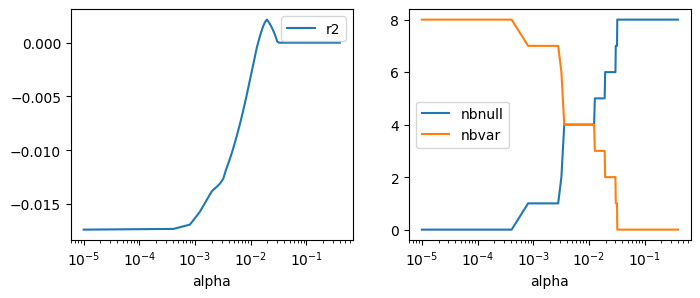

In [21]:
# Affichage de l'évolution du r2 en fonction des alphas sous forme de graphique :
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(df['alpha'], df['r2'], label='r2')
ax[1].plot(df['alpha'], df['nbnull'], label="nbnull")
ax[1].plot(df['alpha'], lasso.coef_.shape[0] - df['nbnull'], label="nbvar")
ax[0].set_xscale('log'); ax[1].set_xscale('log')
ax[0].set_xlabel("alpha"); ax[1].set_xlabel("alpha")
ax[0].legend() ; ax[1].legend()
plt.show()

On remarque que la meilleure métrique de performance est pour alpha = 0.0196.

On peut faire la même chose pour l'Allemagne :

In [22]:
res = []

for alpha in np.linspace(0.00001, 0.4, 1000):
    lasso = Lasso(alpha)
    lasso.fit(data_de_train, target_de_train)
    r2 = r2_score(target_de_test, lasso.predict(data_de_test))
    res.append({'alpha': alpha, 'r2': r2,
                'nbnull': sum(lasso.coef_ == 0)})

df = pd.DataFrame(res)

print("Le meilleur alpha est :", max(res, key=lambda x:x['r2']))

Le meilleur alpha est : {'alpha': 0.02883810810810811, 'r2': 0.07496560767742422, 'nbnull': 4}


On peut maintenant utiliser la régression Lasso avec nos nouvelles valeurs de alpha :

In [23]:
#### Pour la France
print("Régression linéaire Lasso :")
print("- France :")

lasso = Lasso(0.0196)
lasso.fit(data_fr_train, target_fr_train)
predict_fr = lasso.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)



#### Pour l'Allemagne
print("- Allemagne :")

lasso = Lasso(0.0288)
lasso.fit(data_de_train, target_de_train)
predict_de = lasso.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire Lasso :
- France :
    Spearman : 0.02036162396832212
    R2 : 0.0021381703032319344
    RMSE : 1.0735103878093526
- Allemagne :
    Spearman : 0.33732898117924853
    R2 : 0.07496768955097466
    RMSE : 0.980601485657988


# K-Nearest Neighbours (K-NN)

Régression K-NN :
- France :


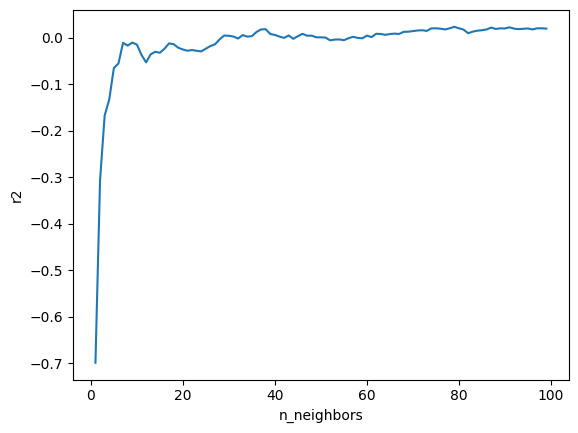

Le meilleur n_neighbors est : [7.90000000e+01 2.39170072e-02]
    Spearman : 0.189876437192882
    R2 : 0.023917007150376368
    RMSE : 1.0617308070486933
- Allemagne :


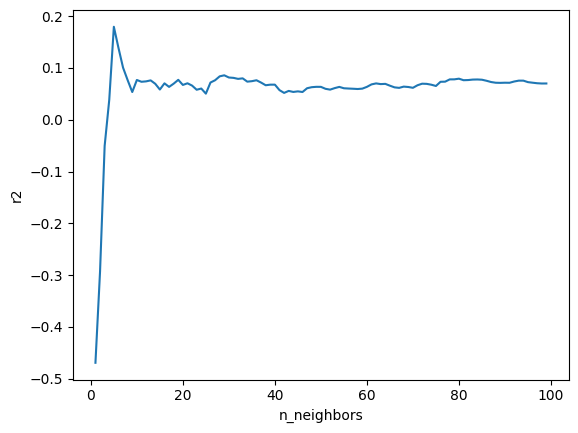

Le meilleur n_neighbors est : [5.         0.17953795]
    Spearman : 0.4209806236544204
    R2 : 0.17953795189535648
    RMSE : 0.9235137034568479


In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Format pour créer un modèle K-NN :
# knn = KNeighborsRegressor(n_neighbors=5)
# knn.fit(data_fr_train, target_fr_train)

print("Régression K-NN :")

#### Pour la France
print("- France :")

# On va chercher le nombre de voisins le plus approprié
scores = []
for n_neighbors in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(data_fr_train, target_fr_train)
    scores.append([n_neighbors, r2_score(target_fr_test, knn.predict(data_fr_test))])

# Affichage de l'évolution du r2 en fonction du nombre de voisins sous forme de graphique :
scores = np.array(scores)
plt.plot(scores[:, 0], scores[:, 1])
plt.xlabel('n_neighbors')
plt.ylabel('r2')
plt.show()

print("Le meilleur n_neighbors est :", max(scores, key=lambda x:x[1]))
fr_n_neighbors = int(max(scores, key=lambda x:x[1])[0])

knn = KNeighborsRegressor(n_neighbors=fr_n_neighbors)
knn.fit(data_fr_train, target_fr_train)
predict_fr = knn.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)



#### Pour l'Allemagne
print("- Allemagne :")

# On va chercher le nombre de voisins le plus approprié
scores = []
for n_neighbors in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(data_de_train, target_de_train)
    scores.append([n_neighbors, r2_score(target_de_test, knn.predict(data_de_test))])

# Affichage de l'évolution du r2 en fonction du nombre de voisins sous forme de graphique :
scores = np.array(scores)
plt.plot(scores[:, 0], scores[:, 1])
plt.xlabel('n_neighbors')
plt.ylabel('r2')
plt.show()

print("Le meilleur n_neighbors est :", max(scores, key=lambda x:x[1]))
de_n_neighbors = int(max(scores, key=lambda x:x[1])[0])

knn = KNeighborsRegressor(n_neighbors=de_n_neighbors)
knn.fit(data_de_train, target_de_train)
predict_de = knn.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

# Arbre de décision pour la régression

In [25]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(data_fr_train, target_fr_train)

print("Arbre de décision pour la régression :")

#### Pour la France
print("- France :")
predict_fr = decision_tree.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)



#### Pour l'Allemagne
print("- Allemagne :")
decision_tree.fit(data_de_train, target_de_train)
predict_de = decision_tree.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Arbre de décision pour la régression :
- France :
    Spearman : 0.13029393670524636
    R2 : -1.851961746314445
    RMSE : 1.8148590192607312
- Allemagne :
    Spearman : 0.04119719485236308
    R2 : -1.0567112824279374
    RMSE : 1.4621797361911275


# Conclusion de l'évaluation des modèles
Grâce aux métriques de Spearman, du R2 et du RMSE, nous pouvons comparer nos différents modèles.
Ainsi, nous trouvons que le modèle K-NN est le plus adapté à nos données, que ce soit pour la France ou pour l'Allemagne. En effet, c'est avec ce modèle que nous observons le coefficient de Spearman le plus proche de 1, le R2 le plus élevé (lui aussi le plus proche de 1) et le RMSE le plus faible.

Dans l'ordre du plus adapté au moins adapté, nous avons les modèles suivants :
1. K-NN
2. Lasso
3. Ridge
4. Régression Linéaire Simple
5. Arbre de décision

Nous pouvons maintenant procéder à une analyse de l'importance des variables pour ce modèle, afin de savoir quel feature a le plus d'impact sur nos résultats :

Feature: 0, Score: 0.00373
Feature: 1, Score: 0.00524
Feature: 2, Score: 0.00497
Feature: 3, Score: 0.00497
Feature: 4, Score: 0.00664
Feature: 5, Score: 0.00135
Feature: 6, Score: 0.01602
Feature: 7, Score: -0.00053


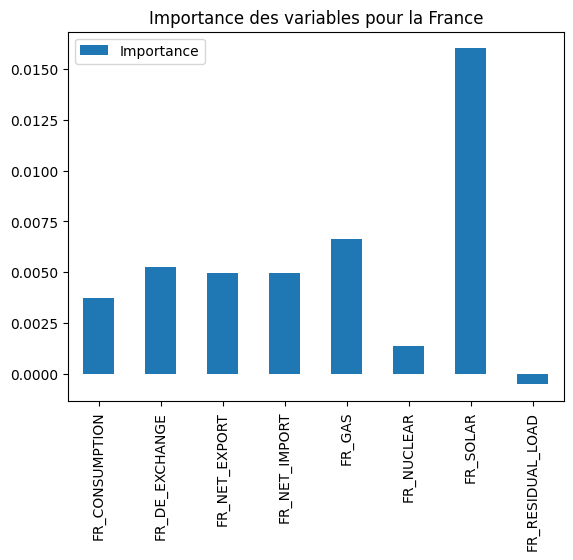

Feature: 0, Score: 0.02665
Feature: 1, Score: 0.01571
Feature: 2, Score: 0.05529
Feature: 3, Score: 0.05529
Feature: 4, Score: 0.05336
Feature: 5, Score: 0.01418
Feature: 6, Score: 0.08782
Feature: 7, Score: 0.06533
Feature: 8, Score: 0.09921
Feature: 9, Score: 0.04338


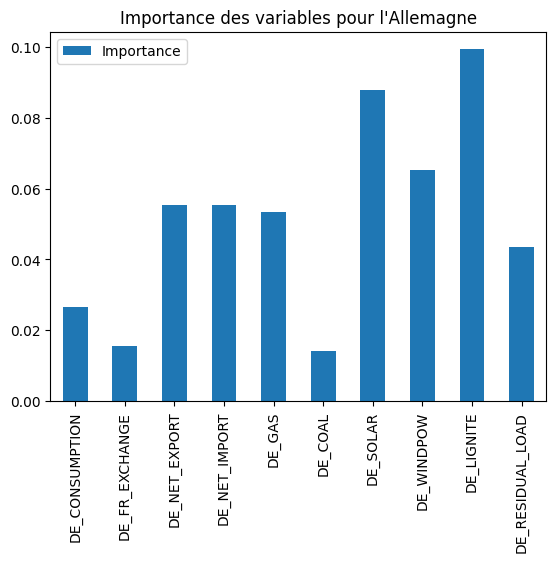

In [26]:
from sklearn.inspection import permutation_importance

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

# D'après l'article https://machinelearningmastery.com/calculate-feature-importance-with-python/

# Pour la France
knn = KNeighborsRegressor(n_neighbors=fr_n_neighbors)
knn.fit(data_fr_train, target_fr_train)

results = permutation_importance(knn, data_fr_train, target_fr_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

df = pd.DataFrame(importance, index=data_fr.columns, columns=['Importance'])
df.plot(kind='bar')
plt.title("Importance des variables pour la France")
plt.show()

# Pour l'Allemagne
knn = KNeighborsRegressor(n_neighbors=de_n_neighbors)
knn.fit(data_de_train, target_de_train)

results = permutation_importance(knn, data_de_train, target_de_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

df = pd.DataFrame(importance, index=data_de.columns, columns=['Importance'])
df.plot(kind='bar')
plt.title("Importance des variables pour l'Allemagne")
plt.show()

Nous voyons que notre sélection de variables au début est plutôt efficace puisque toutes les variables ont l'air d'avoir une importance à peu près égale dans la prédiction des résultats, à l'exception de FR_SOLAR et DE_SOLAR. Cela pourrait s'expliquer par l'irrégularité de la production d'électricité à base d'énergie solaire, et par l'impossibilité de stocker de l'électricité (si en produit suffisamment, on va l'exporter alors que si on n'en produit moins que prévu, on devra en importer et le prix augmentera).

# Génération de DataNew_Y.csv
Pour terminer ce projet, nous allons utiliser le modèle K-NN pour générer de nouvelles données à partir du fichier DataNew_X.csv.

In [33]:
# On importe les données
NewX = pd.read_csv('Data/DataNew_X.csv')

# On sépare en France et Allemagne
# Le code est presque identique à celui du début

# Pour identifier le pays, on remplace la colonne COUNTRY ['FR', 'DE'] par les colonnes COUNTRY_FR et COUNTRY_DE ['0', '1'].
data_per_country = pd.get_dummies(NewX, columns=['COUNTRY'], prefix='COUNTRY')

# Séparation en deux jeux
data_new_fr = data_per_country[data_per_country['COUNTRY_FR']]
data_new_de = data_per_country[data_per_country['COUNTRY_DE']]

# On ne garde que les colonnes significatives :
data_new_fr = data_new_fr[
    ['ID', 'FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_RESIDUAL_LOAD']]
data_new_de = data_new_de[
    ['ID', 'DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL',
     'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD']]

# On supprime les lignes contenant une valeur NaN :
data_new_fr = data_new_fr.dropna()
data_new_de = data_new_de.dropna()

# On entraîne le modèle KNN
knn = KNeighborsRegressor(n_neighbors=fr_n_neighbors)
knn.fit(data_fr_train, target_fr_train)
target_new_fr = knn.predict(data_new_fr.drop('ID', axis=1))

knn = KNeighborsRegressor(n_neighbors=de_n_neighbors)
knn.fit(data_de_train, target_de_train)
target_new_de = knn.predict(data_new_de.drop('ID', axis=1))

NewY = pd.concat([pd.DataFrame(target_new_fr), pd.DataFrame(target_new_de)])

NewY.to_csv('Data/DataNew_Y.csv') # Sauvegarde des TARGET dans un fichier .csv

# Conclusion
Ce projet a été l'occasion d'appliquer nos compétences et nos connaissances que nous avons acquises tout au long de ce module.
Nous avons appris à exploiter un grand nombre de données en les préparant et en les analysant.
Nous avons également appliqué concrètement les différentes méthodes de modélisation des données pour ensuite évaluer les modèles.
Nous tenions à remercier Mme. CHAKCHOUK, dont l'accompagnement nous a permis de mener ce projet à bien, et qui a su nous transmettre ses connaissances tout au long du semestre avec passion.